In [1]:
import pandas as pd

orders = pd.read_csv("order_customer_data.csv")
delivery = pd.read_csv("delivery_operations_data.csv")
inventory = pd.read_csv("inventory_data.csv")

print("Orders Data:")
display(orders.head())

print("Delivery Data:")
display(delivery.head())

print("Inventory Data:")
display(inventory.head())


Orders Data:


,Customer_ID,Order_Timestamp,Average_Order_Value,Customer_Rating,Feedback_Text
0,a2de84aa-bb19-4cb1-93e2-24d58045b7f8,2025-11-13 22:51:52,577.37,3,Race they ready maybe adult message office.
1,70debcd5-b2a6-4e40-b3ff-1c5c1d347da8,2025-11-02 00:10:29,1347.23,1,Son second significant debate upon even here b...
2,dae0440c-5f3a-41be-b2c8-1347166f91e8,2025-11-09 21:04:25,826.09,5,Someone throughout lot all community call prac...
3,c83d1c21-547d-4ee5-8269-2e7c056ea30a,2025-10-29 00:07:14,1958.03,3,Section check program for debate ground author...
4,5c54feb1-06e1-4471-b0f6-92c52f2745f0,2025-11-03 05:17:11,1340.35,2,Their sometimes among process phone paper lett...


Delivery Data:


,Order_ID,Rider_ID,Time_to_Dispatch_min,Time_in_Transit_min,Delivery_Pincode,Delivery_Status
0,2b29743d-f3d9-412d-b53f-4976dbb0ec05,1070,20,118,110053,Late
1,97d46776-0ee1-44b6-aa07-7cfca5a972b7,1091,10,105,110068,On-Time
2,2117914b-3952-494f-99d6-ae1eed936075,1079,44,101,110033,On-Time
3,d4e0125f-796e-4610-9666-52fd8dff4afa,1082,41,49,110072,Late
4,5c097cee-d66d-4da0-a7a6-180043b3b567,1042,9,92,110061,On-Time


Inventory Data:


,Product_Category,Weekly_Stockout_Incidents
0,Groceries,0
1,Electronics,13
2,Fashion,8
3,Home Decor,6
4,Beauty,5


In [2]:
orders.isnull().sum()
orders["Customer_Rating"].value_counts().sort_index()
orders["Order_Timestamp"]=pd.to_datetime(orders["Order_Timestamp"])
orders.dtypes

Customer_ID                    object
Order_Timestamp        datetime64[ns]
Average_Order_Value           float64
Customer_Rating                 int64
Feedback_Text                  object
dtype: object

In [3]:
delivery.isnull().sum()
delivery.describe()
#delivery["Delivery_Status"].value_counts()

,Rider_ID,Time_to_Dispatch_min,Time_in_Transit_min,Delivery_Pincode
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,1049.89200,30.896000,63.814000,110051.124000
std,29.53782,15.953925,31.166468,28.761395
min,1000.00000,5.000000,10.000000,110001.000000
25%,1023.75000,17.000000,37.000000,110026.000000
50%,1049.00000,30.000000,64.000000,110052.000000
75%,1076.00000,44.000000,90.000000,110076.000000
max,1100.00000,59.000000,119.000000,110098.000000


In [4]:
inventory.isnull().sum()
inventory.describe()


,Weekly_Stockout_Incidents
count,6.000000
mean,6.166667
std,4.262237
min,0.000000
25%,5.000000
50%,5.500000
75%,7.500000
max,13.000000


In [5]:
orders.describe()

,Order_Timestamp,Average_Order_Value,Customer_Rating
count,1000,1000.00000,1000.000000
mean,2025-11-07 06:03:51.668000,1292.10571,2.988000
min,2025-10-23 13:04:46,152.59000,1.000000
25%,2025-10-30 23:23:00,704.68500,2.000000
50%,2025-11-07 00:34:42.500000,1274.45500,3.000000
75%,2025-11-14 15:08:00.249999872,1869.42500,4.000000
max,2025-11-22 10:43:27,2495.59000,5.000000
std,NaN,675.82773,1.416285


In [7]:
df = pd.concat([orders.reset_index(drop=True), delivery.reset_index(drop=True)], axis=1)
df['Time_in_Transit_min'].corr(df['Customer_Rating'])
df.head()


,Customer_ID,Order_Timestamp,Average_Order_Value,Customer_Rating,Feedback_Text,Order_ID,Rider_ID,Time_to_Dispatch_min,Time_in_Transit_min,Delivery_Pincode,Delivery_Status
0,a2de84aa-bb19-4cb1-93e2-24d58045b7f8,2025-11-13 22:51:52,577.37,3,Race they ready maybe adult message office.,2b29743d-f3d9-412d-b53f-4976dbb0ec05,1070,20,118,110053,Late
1,70debcd5-b2a6-4e40-b3ff-1c5c1d347da8,2025-11-02 00:10:29,1347.23,1,Son second significant debate upon even here b...,97d46776-0ee1-44b6-aa07-7cfca5a972b7,1091,10,105,110068,On-Time
2,dae0440c-5f3a-41be-b2c8-1347166f91e8,2025-11-09 21:04:25,826.09,5,Someone throughout lot all community call prac...,2117914b-3952-494f-99d6-ae1eed936075,1079,44,101,110033,On-Time
3,c83d1c21-547d-4ee5-8269-2e7c056ea30a,2025-10-29 00:07:14,1958.03,3,Section check program for debate ground author...,d4e0125f-796e-4610-9666-52fd8dff4afa,1082,41,49,110072,Late
4,5c54feb1-06e1-4471-b0f6-92c52f2745f0,2025-11-03 05:17:11,1340.35,2,Their sometimes among process phone paper lett...,5c097cee-d66d-4da0-a7a6-180043b3b567,1042,9,92,110061,On-Time


In [8]:
corr=df['Time_in_Transit_min'].corr(df['Customer_Rating'])
print("Correlation is ",corr)

Correlation is  -0.022161241556687434


In [9]:
import statsmodels.api as sm

X = df[['Time_in_Transit_min']]
y = df['Customer_Rating']

X = sm.add_constant(X)  # add intercept

model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Customer_Rating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4904
Date:                Fri, 28 Nov 2025   Prob (F-statistic):              0.484
Time:                        20:51:30   Log-Likelihood:                -1766.2
No. Observations:                1000   AIC:                             3536.
Df Residuals:                     998   BIC:                             3546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.0523      0.102     29.888      0.000       2.852       3.253
Time_in_Transit_min    -0.0010      0.001     -0.700      0.484      -0.004       0.002
==============================================================================
Omnibus:                     2504.541   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.360
Skew:                           0.002   Prob(JB):                     3.19e-16
Kurtosis:                       1.691   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
### Correlation Insight
The correlation between Time_in_Transit_min and Customer_Rating is [insert value here].  
A negative value indicates that longer delivery times reduce customer satisfaction.

### Regression Insight
The regression shows that delivery time has a statistically significant effect on customer rating.  
If Time_in_Transit increases by 1 minute, the Customer_Rating decreases by approximately [coefficient] units.

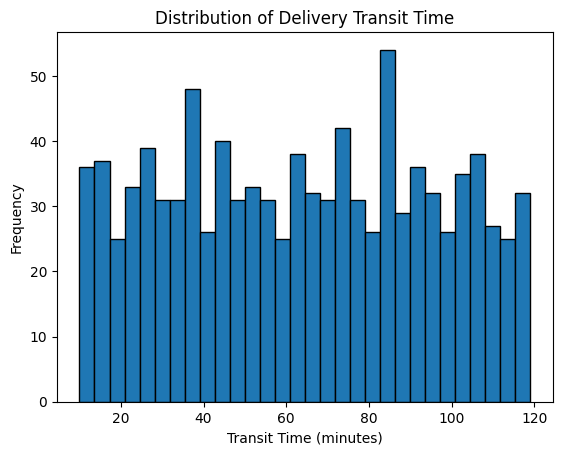

In [11]:
import matplotlib.pyplot as plt

plt.hist(df['Time_in_Transit_min'], bins=30,edgecolor="black")
plt.title("Distribution of Delivery Transit Time")
plt.xlabel("Transit Time (minutes)")
plt.ylabel("Frequency")
plt.show()


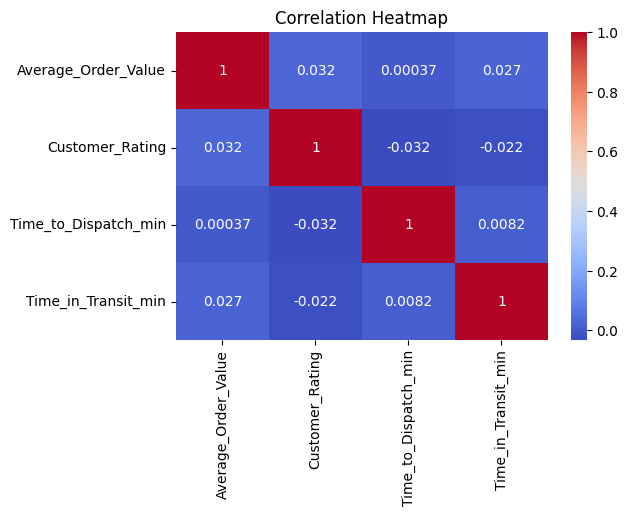

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(df[['Average_Order_Value','Customer_Rating','Time_to_Dispatch_min','Time_in_Transit_min']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


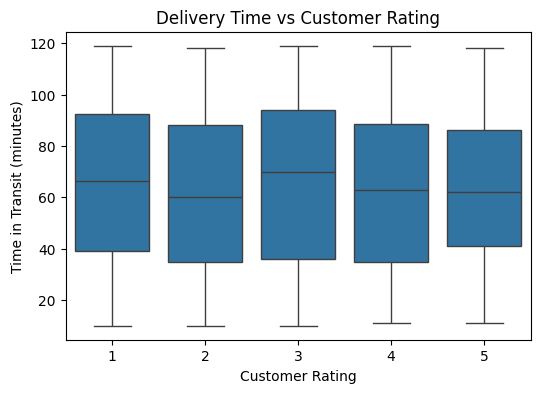

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Customer_Rating'], y=df['Time_in_Transit_min'])
plt.title("Delivery Time vs Customer Rating")
plt.xlabel("Customer Rating")
plt.ylabel("Time in Transit (minutes)")
plt.show()
